<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/7%EC%A3%BC%EC%B0%A8/CNN_w7_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기존에 진행했던 텍스트 데이터를 가지고 CNN 구현해보기

In [ ]:
#데이터 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import mnist

mnist= tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#데이터 전처리
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)
x_test  = x_test[..., tf.newaxis]   # (10000, 28, 28, 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#CNN 모델 적용
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델을 이용한 학습
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 10s - 25ms/step - accuracy: 0.9250 - loss: 0.2389 - val_accuracy: 0.9852 - val_loss: 0.0525
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.9803 - loss: 0.0651 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9846 - loss: 0.0490 - val_accuracy: 0.9897 - val_loss: 0.0333
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9878 - val_loss: 0.0395
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9888 - loss: 0.0339 - val_accuracy: 0.9923 - val_loss: 0.0286
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9917 - val_loss: 0.0291
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9925 - val_loss: 0.0291
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9924 - loss: 0.0224 - val_accuracy: 0.9920 - val_loss: 0.0271
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.9933 - val_loss: 0.0273

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


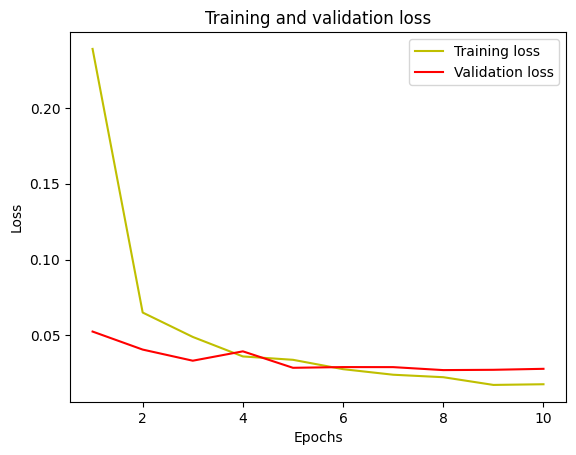

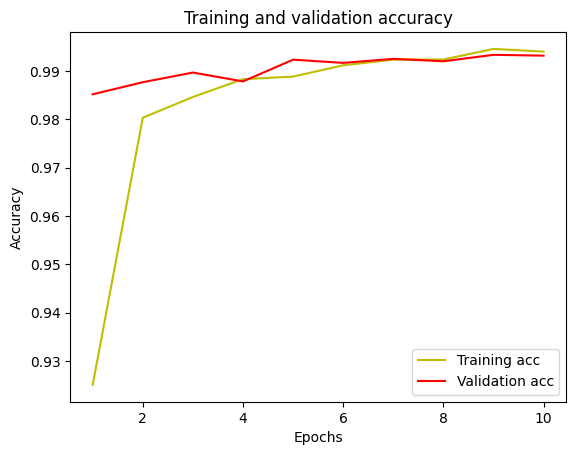

In [ ]:
#loss & acc 평가 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred,axis=1)


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#예측 결과 비교해보기
predictions = model.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))
print("실제 레이블:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
예측 결과: [7 2 1 0 4]
실제 레이블: [7 2 1 0 4]
